In [23]:
# Step 1: Load the dataset
import pandas as pd

data = pd.read_csv("adult 3.csv")

print("\nTop 15 rows:")
print(data.head(15))

print("\nShape of the dataset:", data.shape)

print("\nNull values in each column:")
print(data.isnull().sum())



Top 15 rows:
    age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58                 ?  299831 

In [24]:
# Step 2: Replace unclear values ('?') with 'Unknown'
data['workclass'] = data['workclass'].replace('?', 'Unknown')
data['occupation'] = data['occupation'].replace('?', 'Unknown')
data['native-country'] = data['native-country'].replace('?', 'Unknown')

print("\nWorkclass values:")
print(data['workclass'].value_counts())

print("\nOccupation values:")
print(data['occupation'].value_counts())

print("\nNative-country values:")
print(data['native-country'].value_counts())



Workclass values:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Occupation values:
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Native-country values:
native-country
United-States                 43832
Mexico                          951
Unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada   

In [25]:
# Step 3: Remove irrelevant or very rare categories
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']
data = data[data['education'] != 'Preschool']


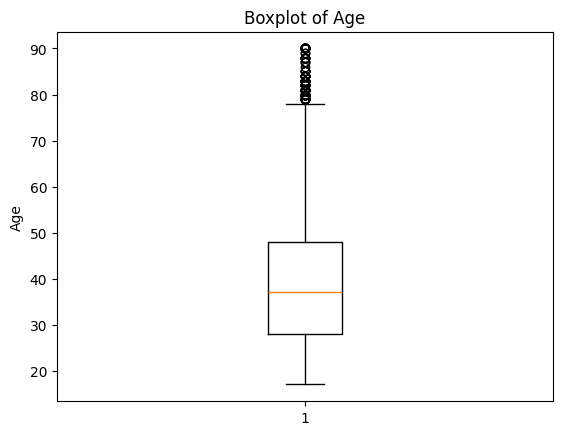


Shape after removing outliers and rare categories: (47619, 15)


In [26]:
# Step 4: Handle outliers in age
import matplotlib.pyplot as plt

plt.boxplot(data['age'])
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

data = data[(data['age'] >= 17) & (data['age'] <= 75)]

print("\nShape after removing outliers and rare categories:", data.shape)


In [27]:
# Step 5: Drop 'education' column (already covered by 'education-num')
data = data.drop(columns=['education'])


In [28]:
# Step 6: Drop duplicate rows
data = data.drop_duplicates()
print("\nShape after removing duplicates:", data.shape)



Shape after removing duplicates: (47574, 14)


In [29]:
# Step 7: Encode categorical columns
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_cols = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']

# Dictionary to hold encoders
encoders = {}

# Encode and save each encoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")  # Save encoder

print("All LabelEncoders have been saved successfully!")


All LabelEncoders have been saved successfully!


In [30]:
# Step 8: Split data into features (X) and target (Y)
X = data.drop(columns=['income'])
Y = data['income']

print("\nX shape:", X.shape)
print("Y shape:", Y.shape)



X shape: (47574, 13)
Y shape: (47574,)


In [31]:
# Step 9: Scale the Data and Split into Train/Test Sets
# Scale the features so all values are between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Show scaled features as a DataFrame
scaled_df = pd.DataFrame(X, columns=data.drop(columns=['income']).columns)

print("\nScaled feature sample (first 5 rows):")
print(scaled_df.head())

# Split the data into training and testing sets (80-20) with class balance
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=23, stratify=Y)

print("\nTraining features shape:", xtrain.shape)
print("Testing features shape:", xtest.shape)
print("Training labels shape:", ytrain.shape)
print("Testing labels shape:", ytest.shape)



Scaled feature sample (first 5 rows):
        age  workclass    fnlwgt  educational-num  marital-status  occupation  \
0  0.137931   0.333333  0.145129         0.250000        0.666667    0.428571   
1  0.362069   0.333333  0.052451         0.416667        0.333333    0.285714   
2  0.189655   0.166667  0.219649         0.666667        0.333333    0.714286   
3  0.465517   0.333333  0.100153         0.500000        0.333333    0.428571   
4  0.017241   1.000000  0.061708         0.500000        0.666667    1.000000   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0           0.6   0.5     1.0      0.000000           0.0        0.397959   
1           0.0   1.0     1.0      0.000000           0.0        0.500000   
2           0.0   1.0     1.0      0.000000           0.0        0.397959   
3           0.0   0.5     1.0      0.076881           0.0        0.397959   
4           0.6   1.0     0.0      0.000000           0.0        0.295918   

   native-c

In [32]:
# Step 10: Train and Evaluate a K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
knn = KNeighborsClassifier()

# Fit the model on training data
knn.fit(xtrain, ytrain)

# Make predictions on test data
predictions = knn.predict(xtest)

# Evaluate accuracy
accuracy = accuracy_score(ytest, predictions)

print("\nKNN Accuracy on test set:", round(accuracy * 100, 2), "%")



KNN Accuracy on test set: 82.8 %


In [33]:
# Step 11: Train and Evaluate Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train on the training data
logreg.fit(xtrain, ytrain)

# Predict on the test set
logreg_pred = logreg.predict(xtest)

# Evaluate accuracy
logreg_acc = accuracy_score(ytest, logreg_pred)

print("Logistic Regression Accuracy on test set:", round(logreg_acc * 100, 2), "%")


Logistic Regression Accuracy on test set: 82.62 %


In [34]:
# Step 12: Train and Evaluate a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize decision tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(xtrain, ytrain)

# Predict on test data
dtree_pred = dtree.predict(xtest)

# Evaluate accuracy
dtree_acc = accuracy_score(ytest, dtree_pred)

print("Decision Tree Accuracy on test set:", round(dtree_acc * 100, 2), "%")


Decision Tree Accuracy on test set: 81.17 %


In [35]:
# Step 13: Train and Evaluate a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize random forest model
rforest = RandomForestClassifier()

# Train the model
rforest.fit(xtrain, ytrain)

# Predict on test data
rforest_pred = rforest.predict(xtest)

# Evaluate accuracy
rforest_acc = accuracy_score(ytest, rforest_pred)

print("Random Forest Accuracy on test set:", round(rforest_acc * 100, 2), "%")


Random Forest Accuracy on test set: 85.85 %


KNN Accuracy: 82.8 %
Logistic Regression Accuracy: 82.62 %
Decision Tree Accuracy: 81.17 %
Random Forest Accuracy: 85.85 %


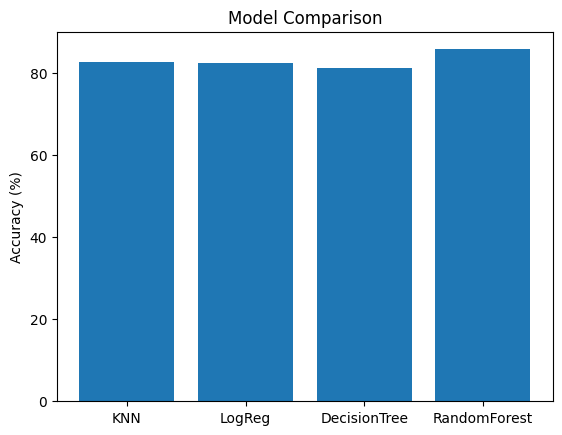

In [36]:
# Step 14: Compare Model Accuracies
# Simple accuracy comparison
print("KNN Accuracy:", round(accuracy_score(ytest, predictions) * 100, 2), "%")
print("Logistic Regression Accuracy:", round(accuracy_score(ytest, logreg_pred) * 100, 2), "%")
print("Decision Tree Accuracy:", round(accuracy_score(ytest, dtree_pred) * 100, 2), "%")
print("Random Forest Accuracy:", round(accuracy_score(ytest, rforest_pred) * 100, 2), "%")

import matplotlib.pyplot as plt

models = ['KNN', 'LogReg', 'DecisionTree', 'RandomForest']
scores = [
    accuracy_score(ytest, predictions),
    accuracy_score(ytest, logreg_pred),
    accuracy_score(ytest, dtree_pred),
    accuracy_score(ytest, rforest_pred)
]

plt.bar(models, [round(score * 100, 2) for score in scores])
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.show()


Confusion Matrix:
[[6719  479]
 [ 867 1450]]

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7198
        >50K       0.75      0.63      0.68      2317

    accuracy                           0.86      9515
   macro avg       0.82      0.78      0.80      9515
weighted avg       0.85      0.86      0.85      9515



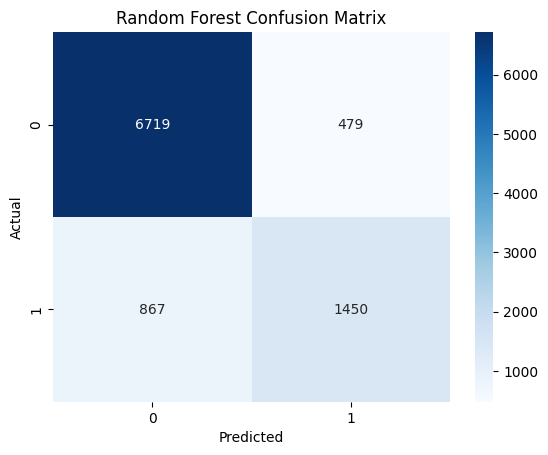

In [37]:
# Opting Random Forest as the best model and moving on
# Step 15: Confusion Matrix & Classification Report (Random Forest)
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(ytest, rforest_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(ytest, rforest_pred)
print("\nClassification Report:")
print(report)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [38]:
#Step 16 – Tune Random Forest with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize the base model
rforest = RandomForestClassifier()

# Setup GridSearchCV
grid = GridSearchCV(rforest, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid.fit(xtrain, ytrain)

# Best model after tuning
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [39]:
# Step 17: Prepare Final Model for Real-World Use
import joblib

# Save the tuned Random Forest model
joblib.dump(best_model, "salary_predictor_model.pkl")

# Load the model later
loaded_model = joblib.load("salary_predictor_model.pkl")

joblib.dump(scaler, "scaler.pkl")

# Predict on new preprocessed data
# loaded_model.predict(new_data)


['scaler.pkl']